<a href="https://colab.research.google.com/github/jacksonguedes/IACD/blob/main/Aula06_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=04829d7211e1e0e3983f1dee3675674345cbf14f85a38e2aeecc4542bb7966fc
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [5]:
import numpy as np
import skfuzzy as fuzz # pip install scikit-fuzzy
import matplotlib.pyplot as plt

In [6]:
# Gerar variaveis dfe universo
# * Qualidade e servico em faixas subjetivas [0,10]
# * Gorjetas  tem um intervalo de [0, 25] %
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

In [7]:
# Gerar funções de associação difusas
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo  = fuzz.trimf(x_tip,  [0, 0, 13])
tip_md  = fuzz.trimf(x_tip,  [0, 13, 25])
tip_hi  = fuzz.trimf(x_tip,  [13, 25, 25])

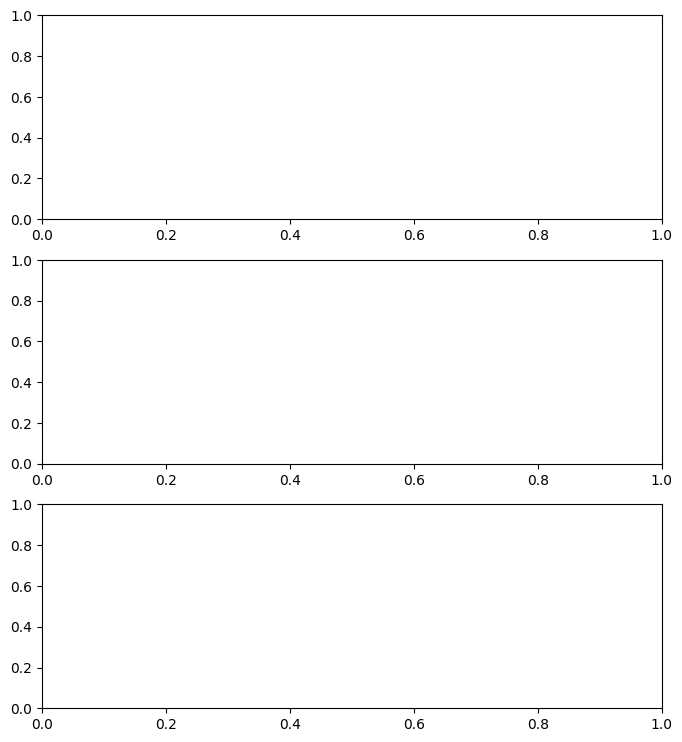

In [8]:
# Visualize esses universos e funcoes de associação
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,figsize=(8,9))

In [9]:
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5,label='Ruim')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5,label='Razoável')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5,label='Excelente')
ax0.set_title('Qualidade da comida')
ax0.legend()

In [10]:
ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5,label='Ruim')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5,label='Razoável')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5,label='Excelente')
ax1.set_title('Qualidade do serviço')
ax1.legend()

In [11]:
ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5,label='Baixo')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5,label='Médio')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5,label='Alto')
ax2.set_title('Valor da gorjeta')
ax2.legend()

In [13]:
# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [14]:
plt.tight_layout()
plt.savefig("funções de inferência.png")

<Figure size 640x480 with 0 Axes>

In [15]:
#FUZZIFICAÇÃO E APLICAÇÃO DE REGRAS

# Notas
nota_comida = 4
nota_servico = 7

In [16]:
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, nota_comida)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, nota_comida)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, nota_comida)
print(qual_level_lo, qual_level_md, qual_level_hi)

0.2 0.8 0.0


In [17]:
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, nota_servico)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, nota_servico)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, nota_servico)
print(serv_level_lo, serv_level_md, serv_level_hi)

0.0 0.6 0.4


# OU no sistema fuzzy retorna o valor maximo

# Regras
# SE o serviço foi ruim ou qualidade da comida foi ruim ENTAO a gorjeta sera baixa
# SE o servico foi mediano ENTAO a gorjeta sera mediana
# SE o servico foi bom ou a qualidade da comida era boa, ENATO a gorjeta sera alta

# Inicio da a plicacao das regras. A regra 1 diz respeito a comida OU servico Ruim.
# O operador OR significa que pegamos o maximo desses dois
# DETERMINA O ANSTECEDENTE

In [18]:
regra1 = np.fmax(qual_level_lo, serv_level_lo) # OU - > Maximo

In [19]:
# Aplica-se a gora a funcao de implicacao para formar CONSEQUENTE
# membership function with 'np.fmim'
tip_activation_lo = np.fmin(regra1, tip_lo)

In [20]:
# O ANTECEDENTE  é simples, dai a plica-se diretamente a funcao de implicacao
# Para a regra 2, conectamos o servico Aceitavel a gorjeta media
regra2 =  serv_level_md
tip_activation_md = np.fmin(regra2, tip_md)

In [21]:
# Para a regra3, conectamos servico Excelente OU comida Excelente com alta gorjeta
regra3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(regra3, tip_hi)

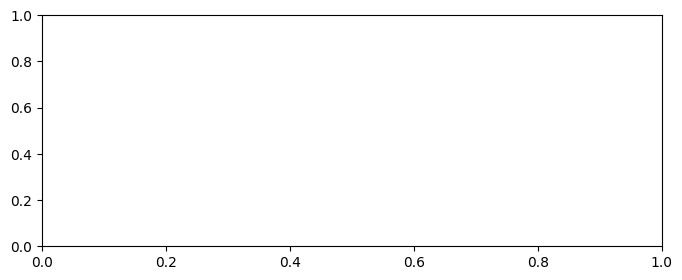

In [22]:
# Visualizar resultados
tip0 = np.zeros_like(x_tip)
fig, ax0 = plt.subplots(figsize=(8,3))

In [23]:
ax0.fill_between(x_tip, tip0, tip_activation_lo,facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_md,facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi,facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Saida da funcao de implicacao')

Text(0.5, 1.0, 'Saida da funcao de implicacao')

In [24]:
# Desativa os eixos superior / direito
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [25]:
# DEFUZZIFICAÇÃO

# Agregar todas as tres funcoes de associacao de saida
agregacao = np.fmax(tip_activation_lo,
                    np.fmax(tip_activation_md, tip_activation_hi))


In [26]:
# realiza a defuzzificacao com base no centroide
gorjeta = fuzz.defuzz(x_tip, agregacao, 'centroid')

In [27]:
# Apenas para plotage,m
tip_activation = fuzz.interp_membership(x_tip, agregacao, gorjeta)

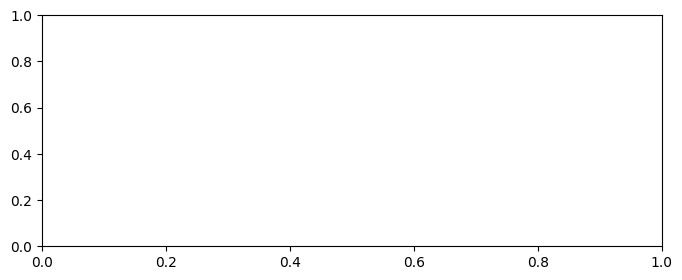

In [28]:
# visualizacao dos resultados
fig, ax0 = plt.subplots(figsize=(8,3))

In [29]:
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5,label='--')
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5,label='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5,label='--')
ax0.fill_between(x_tip, tip0, agregacao,facecolor='Orange', alpha=0.7)
ax0.plot([gorjeta, gorjeta], [0, tip_activation], 'k', linewidth=1.5,alpha=0.9)
ax0.set_title('Agregacao das saidas e resultados (ver linha)')

Text(0.5, 1.0, 'Agregacao das saidas e resultados (ver linha)')

In [30]:
# Desativa os eixos superior / direito
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

<Figure size 640x480 with 0 Axes>